# LIBRERÍAS

In [174]:
# instalar folium solo si no está
try:
    import folium
    from folium.plugins import MarkerCluster
except ImportError:
    # Use %pip install to ensure compatibility with Jupyter Notebook
    %pip install folium
    import folium
    from folium.plugins import MarkerCluster

In [154]:
import pandas as pd
import unicodedata
import re
from pathlib import Path
import pandas as pd, re, unicodedata
from difflib import SequenceMatcher
from pathlib import Path
from dateutil import parser
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd, unicodedata, re
from pathlib import Path
from IPython.display import display
import math
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame, display
import pandas as pd, numpy as np, re, unicodedata, os
from scipy.stats import skew, kurtosis
import ipywidgets as w
from IPython.display import display, clear_output
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, IntSlider, VBox, HBox, Output, Layout
from IPython.display import display
from matplotlib.ticker import PercentFormatter
import numpy as np
from scipy.interpolate import PchipInterpolator
import warnings

# CARGA DE BASE DE DATOS

In [155]:
# Definir el nombre del archivo.
archivo = 'Copia de Calidad_del_agua_del_Rio_Cauca.csv'

# Leer el archivo CSV usando el delimitador de punto y coma.
df = pd.read_csv(archivo, sep=';')

# Mostrar las primeras filas para confirmar que los datos se han cargado.
df.head()

,FECHA DE MUESTREO,ESTACIONES,pH,TEMPERATURA (°C),COLOR (UPC),TURBIEDAD (UNT),SOLIDOS TOTALES (mg SST/l),SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),SOLIDOS DISUELTOS (mg SD/l),DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),...,CROMO TOTAL (mg Cr/l),CROMO DISUELTO (mg Cr/l),NIQUEL TOTAL (mg Ni/l),NIQUEL DISUELTO (mg Ni/l),PLOMO TOTAL (mg Pb/l),PLOMO DISUELTO (mg Pb/l),MERCURIO (µg Hg/l),COLIFORMES TOTALES (NMP/100 ml),COLIFORMES FECALES (NMP/100 ml),CAUDAL (m3/s)
0,12/19/1998 12:00:00 AM,YOTOCO,"7,1","4,1",NaN,"4,1",NaN,110,NaN,"4,2",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/19/1998 12:00:00 AM,MEDIACANOA,7,2,NaN,2,NaN,130,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/19/1998 12:00:00 AM,PASO DE LA TORRE,7,"22,9",NaN,"3,4",NaN,"153,3",NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/09/1990 0:00,ANTES SUAREZ,"6,6",NaN,NaN,NaN,157,"29,3","127,7","0,5",...,NaN,NaN,0,NaN,NaN,NaN,NaN,"2,4*10E4",23,NaN
4,1/10/1990 0:00,ANTES RIO OVEJAS,"6,7",NaN,NaN,NaN,143,65,78,"2,1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,4*10E4",24*10E4,NaN


# NORMALIZACIÓN DE ESTACIONES

In [156]:
# Guardar lista y cantidad original de estaciones
estaciones_originales = df['ESTACIONES'].unique()
n_registros_antes = len(df)

# Función de estandarización
def estandarizar_estacion(nombre):
    if isinstance(nombre, str):
        nombre = nombre.strip()                  # Quitar espacios al inicio/fin
        nombre = re.sub(r'\s+', ' ', nombre)     # Reemplazar múltiples espacios
        nombre = nombre.upper()                  # Pasar a mayúsculas
    return nombre

# Aplicar estandarización directamente sobre el df
df['ESTACIONES'] = df['ESTACIONES'].apply(estandarizar_estacion)

# Lista después de estandarizar
estaciones_estandarizadas = df['ESTACIONES'].unique()
n_registros_despues = len(df)

# Crear tabla comparativa solo de nombres (como en la imagen)
comparacion = pd.DataFrame({
    'Antes': sorted(estaciones_originales),
    'Después': sorted(estaciones_estandarizadas) + [''] * (len(estaciones_originales) - len(estaciones_estandarizadas))
})

print(f"Estaciones únicas antes: {len(estaciones_originales)}")
print(f"Estaciones únicas después: {len(estaciones_estandarizadas)}")
print(f"Registros totales antes: {n_registros_antes}")
print(f"Registros totales después: {n_registros_despues}")

display(comparacion)



Estaciones únicas antes: 24
Estaciones únicas después: 20
Registros totales antes: 2254
Registros totales después: 2254


,Antes,Después
0,ANACARO,ANACARO
1,ANTES INTERCEPTOR,ANTES INTERCEPTOR
2,ANTES INTERCEPTOR SUR,ANTES INTERCEPTOR SUR
3,ANTES RIO OVEJAS,ANTES RIO OVEJAS
4,ANTES RIO TIMBA,ANTES RIO TIMBA
5,ANTES SUAREZ,ANTES SUAREZ
6,JUANCHITO,JUANCHITO
7,LA VICTORIA,LA VICTORIA
8,MEDIACANOA,MEDIACANOA
9,PASO DE LA BALSA,PASO DE LA BALSA


In [157]:
# Conteo de registros por estación (ordenado de mayor a menor)
conteo_estaciones = df['ESTACIONES'].value_counts().reset_index()
conteo_estaciones.columns = ['Estacion', 'Cantidad']

print("Cantidad de registros por estación:")
display(conteo_estaciones)


Cantidad de registros por estación:


,Estacion,Cantidad
0,JUANCHITO,130
1,MEDIACANOA,128
2,PASO DE LA TORRE,127
3,PUERTO ISAACS,126
4,VIJES,125
5,PASO DEL COMERCIO,124
6,PUENTE HORMIGUERO,122
7,YOTOCO,121
8,PASO DE LA BOLSA,116
9,PASO DE LA BALSA,115


In [158]:
# Filtrar estaciones con al menos 50 registros
df_filtrado = df.groupby('ESTACIONES').filter(lambda x: len(x) >= 50)

# Verificar cuántas estaciones quedaron
estaciones_restantes = df_filtrado['ESTACIONES'].unique()
print("Número de estaciones restantes:", len(estaciones_restantes))
print("Estaciones restantes:", estaciones_restantes)

# Conteo de registros después del filtrado
conteo_estaciones_filtrado = df_filtrado['ESTACIONES'].value_counts().reset_index()
conteo_estaciones_filtrado.columns = ['Estacion', 'Cantidad']

display(conteo_estaciones_filtrado)

Número de estaciones restantes: 19
Estaciones restantes: ['YOTOCO' 'MEDIACANOA' 'PASO DE LA TORRE' 'ANTES SUAREZ'
 'ANTES RIO OVEJAS' 'ANTES RIO TIMBA' 'PASO DE LA BALSA'
 'PASO DE LA BOLSA' 'PUENTE HORMIGUERO' 'ANTES INTERCEPTOR SUR'
 'JUANCHITO' 'PASO DEL COMERCIO' 'PUERTO ISAACS' 'VIJES' 'RIOFRIO'
 'PUENTE GUAYABAL' 'LA VICTORIA' 'ANACARO' 'PUENTE LA VIRGINIA']


,Estacion,Cantidad
0,JUANCHITO,130
1,MEDIACANOA,128
2,PASO DE LA TORRE,127
3,PUERTO ISAACS,126
4,VIJES,125
5,PASO DEL COMERCIO,124
6,PUENTE HORMIGUERO,122
7,YOTOCO,121
8,PASO DE LA BOLSA,116
9,ANTES RIO OVEJAS,115


# NORMALIZACIÓN DE FECHAS

In [159]:
# Revisar ejemplos de la columna de fechas
print("Ejemplos de FECHA DE MUESTREO:")
print(df_filtrado["FECHA DE MUESTREO"].dropna().unique()[:10])

Ejemplos de FECHA DE MUESTREO:
['12/19/1998 12:00:00 AM' '5/09/1990 0:00' '1/10/1990 0:00'
 '5/02/1990 0:00' '1/11/1990 0:00' '1/12/1990 0:00'
 '07/25/1990 12:00:00 AM' '5/10/1990 0:00' '05/16/1990 12:00:00 AM'
 '8/01/1990 0:00']


In [160]:
col = "FECHA DE MUESTREO"

pat = re.compile(r"(\d{1,4})[/-](\d{1,2})[/-](\d{1,4})")

def a_yyyy_mm_dd(s):
    s = str(s).strip()
    m = pat.search(s)
    if not m:
        return None  # quedará igual que venía, sin perder fila
    a, b, c = m.groups()
    a_i, b_i, c_i = int(a), int(b), int(c)

    # caso YYYY-MM-DD
    if len(a) == 4:
        y, m_, d = a_i, b_i, c_i
    # caso con año al final: MM-DD-YYYY o DD-MM-YYYY (decidir por >12)
    elif len(c) == 4:
        if 1 <= a_i <= 12 and 1 <= b_i <= 31:
            y, m_, d = c_i, a_i, b_i       # MM-DD-YYYY
        else:
            y, m_, d = c_i, b_i, a_i       # DD-MM-YYYY
    # caso años de 2 dígitos ambos lados (raro): intenta MM-DD-YY y luego DD-MM-YY
    else:
        y = 1900 + c_i if c_i >= 50 else 2000 + c_i
        if 1 <= a_i <= 12 and 1 <= b_i <= 31:
            m_, d = a_i, b_i
        else:
            m_, d = b_i, a_i

    return f"{y:04d}-{m_:02d}-{d:02d}"

# 1) estandarizar a texto YYYY-MM-DD (sin hora)
estandar = df_filtrado[col].map(a_yyyy_mm_dd)

# 2) si alguna no coincidió con el patrón, conservar el texto original para no perder fila
estandar = estandar.fillna(df_filtrado[col].astype(str).str.extract(pat, expand=True).apply(
    lambda r: f"{int(r[0]):04d}-{int(r[1]):02d}-{int(r[2]):02d}" if pd.notna(r[0]) and pd.notna(r[1]) and pd.notna(r[2]) else None,
    axis=1
))

# 3) asignar y convertir a datetime; normalizar quita hora/min/seg
df_filtrado[col] = pd.to_datetime(estandar, errors="coerce").dt.normalize()

# 4) reportar y mostrar ejemplos
print("dtype:", df_filtrado[col].dtype)
print("NaT después:", int(df_filtrado[col].isna().sum()))
print("Ejemplos:", df_filtrado[col].dropna().dt.strftime("%Y-%m-%d").unique()[:10])

dtype: datetime64[ns]
NaT después: 11
Ejemplos: ['1998-12-19' '1990-05-09' '1990-01-10' '1990-05-02' '1990-01-11'
 '1990-01-12' '1990-07-25' '1990-05-10' '1990-05-16' '1990-08-01']


# NORMALIZACIÓN DE DATOS

In [161]:
# Revisar los tipos de datos de todas las columnas
df_filtrado.dtypes

FECHA DE MUESTREO                          datetime64[ns]
ESTACIONES                                         object
pH                                                 object
TEMPERATURA (°C)                                   object
COLOR (UPC)                                        object
TURBIEDAD (UNT)                                    object
SOLIDOS TOTALES (mg SST/l)                         object
SOLIDOS SUSPENDIDOS TOTALES (mg SS/l)              object
SOLIDOS DISUELTOS (mg SD/l)                        object
DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l)            object
DEMANDA QUIMICA DE OXIGENO (mg O2/l)               object
OXIGENO DISUELTO (mg O2/l)                         object
DUREZA TOTAL (mg CaCO3/l)                          object
DUREZA CALCICA (mg CaCO3/l)                        object
DUREZA MAGNESICA (mg CaCO3/l)                      object
CALCIO (mg Ca/l)                                   object
MAGNESIO (mg Mg/l)                                 object
ALCALINIDAD TO

In [162]:
# 1) Convertir automát. a numérico (excepto columnas categóricas)
cols_excluir = ["ESTACIONES"]
for col in df_filtrado.select_dtypes(include=["object"]).columns:
    if col not in cols_excluir:
        df_filtrado[col] = pd.to_numeric(
            df_filtrado[col].astype(str).str.replace(",", ".", regex=False),
            errors="coerce"
        )

# 2) Resumir conteos por variable
totales = len(df_filtrado)
resumen = (
    pd.DataFrame({
        "Variable": df_filtrado.columns,
        "Tipo": [str(t) for t in df_filtrado.dtypes],
        "N.Valid": [df_filtrado[c].notna().sum() for c in df_filtrado.columns]
    })
    .assign(Pct_Valid=lambda d: (d["N.Valid"] / totales * 100).round(2))
    .sort_values("Variable")
    .reset_index(drop=True)
)

print("Filas totales:", totales)
display(resumen)

Filas totales: 2251


,Variable,Tipo,N.Valid,Pct_Valid
0,ALCALINIDAD TOTAL (mg CaCO3/l),float64,2156,95.78
1,BICARBONATOS (mg CaCO3/l),float64,2155,95.74
2,CADMIO DISUELTO (mg Cd/l),float64,0,0.00
3,CADMIO TOTAL (mg Cd/l),float64,100,4.44
4,CALCIO (mg Ca/l),float64,2163,96.09
5,CAUDAL (m3/s),float64,222,9.86
6,CIANUROS (µg CN-/l),float64,0,0.00
7,CLORUROS (mg Cl/l),float64,2080,92.40
8,COBRE DISUELTO (mg Cu/l),float64,0,0.00
9,COBRE TOTAL (mg Cu/l),float64,537,23.86


In [163]:
# Número total de filas
total_filas = len(df_filtrado)

# Conteo de valores no nulos por columna
validos = df_filtrado.notna().sum()

# Porcentaje de datos válidos por columna
porcentaje_validos = validos / total_filas

# Identificar columnas que no cumplen el umbral (menos del 70%)
cols_baja_cobertura = porcentaje_validos[porcentaje_validos < 0.70].index.tolist()

print("Columnas con <70% de datos válidos:", cols_baja_cobertura)
print("Total a eliminar:", len(cols_baja_cobertura))

# Eliminar esas columnas del DataFrame
df_filtrado = df_filtrado.drop(columns=cols_baja_cobertura)

print("Columnas finales:", df_filtrado.shape[1])

Columnas con <70% de datos válidos: ['HIERRO DISUELTO (mg Fe/l)', 'MANGANESO DISUELTO (mg Mn/l)', 'SODIO DISUELTO (mg Na/l)', 'POTASIO DISUELTO (mg K/l)', 'COBRE TOTAL (mg Cu/l)', 'COBRE DISUELTO (mg Cu/l)', 'ZINC TOTAL (mg Zn/l)', 'ZINC DISUELTO (mg Zn/l)', 'CIANUROS (µg CN-/l)', 'FLUORUROS (mg F/l)', 'SULFUROS (mg S-2/l)', 'SILICE (mg Si/l)', 'NITROGENO TOTAL (mg N/l)', 'NITROGENO AMONIACAL (mg N-NH3/l)', 'FOSFATOS (mg PO4/l)', 'CADMIO TOTAL (mg Cd/l)', 'CADMIO DISUELTO (mg Cd/l)', 'CROMO TOTAL (mg Cr/l)', 'CROMO DISUELTO (mg Cr/l)', 'NIQUEL TOTAL (mg Ni/l)', 'NIQUEL DISUELTO (mg Ni/l)', 'PLOMO TOTAL (mg Pb/l)', 'PLOMO DISUELTO (mg Pb/l)', 'MERCURIO (µg Hg/l)', 'CAUDAL (m3/s)']
Total a eliminar: 25
Columnas finales: 31


In [164]:
# Copia de trabajo
df_stats = df_filtrado.copy()

# Función para formatear valores
def formatear_valor(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, np.integer)):
        return int(x)
    if isinstance(x, (float, np.floating)):
        if x.is_integer():
            return int(x)  # Mostrar sin decimales si es entero
        else:
            return round(x, 2)  # Máx. 2 decimales
    return x

# Función para calcular estadísticas
def calcular_estadisticas(df):
    stats = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            serie = df[col].dropna()
            stats.append({
                "Variable": col,
                "Tipo": "Numérica",
                "No. válidos": serie.count(),
                "No. nulos": df[col].isna().sum(),
                "% Nulos": round(df[col].isna().mean()*100, 2),
                "Mínimo": formatear_valor(serie.min()),
                "P5": formatear_valor(serie.quantile(0.05)),
                "Mediana": formatear_valor(serie.median()),
                "P95": formatear_valor(serie.quantile(0.95)),
                "Máximo": formatear_valor(serie.max()),
                "Media": formatear_valor(serie.mean()),
                "Desv. Estándar": formatear_valor(serie.std()),
                "Varianza": formatear_valor(serie.var()),
                "Asimetría": formatear_valor(skew(serie, bias=False)),
                "Curtosis": formatear_valor(kurtosis(serie, bias=False))
            })
        else:
            stats.append({
                "Variable": col,
                "Tipo": "Categórica",
                "No. válidos": df[col].notna().sum(),
                "No. nulos": df[col].isna().sum(),
                "% Nulos": round(df[col].isna().mean()*100, 2),
                "Valores únicos": df[col].nunique()
            })
    return pd.DataFrame(stats)

# Calcular estadísticas
tabla_estadisticas = calcular_estadisticas(df_stats)

# Configuración global: sin notación científica
pd.set_option("display.float_format", "{:,.2f}".format)

# Mostrar tabla
display(tabla_estadisticas)


,Variable,Tipo,No. válidos,No. nulos,% Nulos,Valores únicos,Mínimo,P5,Mediana,P95,Máximo,Media,Desv. Estándar,Varianza,Asimetría,Curtosis
0,FECHA DE MUESTREO,Categórica,2240,11,0.49,188.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESTACIONES,Categórica,2251,0,0.00,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pH,Numérica,2205,46,2.04,NaN,4.10,6.40,7.07,7.62,9.70,7.04,0.41,0.17,-0.10,5.23
3,TEMPERATURA (°C),Numérica,1953,298,13.24,NaN,0.00,16.00,22.40,26.10,32.70,22.02,3.60,12.99,-2.34,8.91
4,COLOR (UPC),Numérica,1879,372,16.53,NaN,0.00,20.00,70.00,422.00,"2,956.00",135.40,244.71,"59,881.68",6.16,49.51
5,TURBIEDAD (UNT),Numérica,2087,164,7.29,NaN,1.00,6.49,65.00,500.00,"1,900.00",130.05,168.80,"28,494.10",2.79,11.46
6,SOLIDOS TOTALES (mg SST/l),Numérica,2191,60,2.67,NaN,0.00,82.00,206.00,699.00,"2,361.00",274.80,226.92,"51,490.95",3.15,15.85
7,SOLIDOS SUSPENDIDOS TOTALES (mg SS/l),Numérica,2185,66,2.93,NaN,1.20,11.50,92.60,567.60,"2,112.00",164.76,202.01,"40,806.29",3.07,14.48
8,SOLIDOS DISUELTOS (mg SD/l),Numérica,2187,64,2.84,NaN,0.00,53.36,108.00,208.70,864.40,117.57,63.66,"4,052.14",3.89,28.74
9,DEMANDA BIOQUIMICA DE OXIGENO (mg O2/l),Numérica,2089,162,7.20,NaN,0.10,1.01,3.10,10.06,427.00,5.23,16.26,264.38,16.24,332.99


# ANÁLISIS DE ESTACIONES

In [165]:
import pandas as pd, re, unicodedata, math
from IPython.display import display

# base de trabajo
base = df_filtrado

# normalizadores
def norm(s):
    s = unicodedata.normalize("NFKD", str(s)).encode("ascii","ignore").decode("ascii")
    s = re.sub(r"\s+", " ", s).strip().upper()
    return s

def sin_parentesis(s):
    return re.sub(r"\s*\(.*?\)\s*$", "", str(s)).strip()

def canon(s):
    x = norm(sin_parentesis(s))
    x = re.sub(r"\bSOLIDOS\s+DISUELTOS\s+TOTALES\b", "SOLIDOS DISUELTOS", x)
    x = re.sub(r"\bSOLIDOS\s+TOTALES\s+DISUELTOS\b", "SOLIDOS DISUELTOS", x)
    x = re.sub(r"\bS\.?D\.?\b", "SOLIDOS DISUELTOS", x)
    return x

# columnas numericas de df_filtrado
num_cols = base.select_dtypes(include="number").columns.tolist()
df_map = pd.DataFrame({
    "Variable_df": num_cols,
    "key_full":  [norm(c) for c in num_cols],
    "key_base":  [canon(c) for c in num_cols],
})

# cargar diccionario
dic = pd.read_excel("diccionario.xlsx")

def pick(cands):
    for c in dic.columns:
        cl = c.lower()
        if any(k in cl for k in cands):
            return c
    return None

c_param = pick(["parámetro","parametro","variable","nombre","campo","columna"])
c_def   = pick(["defin"])
c_rel   = pick(["relacion","relación"])
c_ref   = pick(["referenc"])
c_v     = pick(["verde"])
c_a     = pick(["amarill"])
c_n     = pick(["naranja"])
c_r     = pick(["rojo"])
assert c_param is not None, "No se encontró columna de nombre en diccionario.xlsx"

# preparar claves del diccionario
dic = dic.rename(columns={c_param:"Parametro"})
dic["Unidad_dic"] = dic["Parametro"].str.extract(r"\((.*?)\)\s*$")
dic["Nombre_dic"] = dic["Parametro"].map(sin_parentesis)
dic["key_full"]   = dic["Parametro"].map(norm)
dic["key_base"]   = dic["Parametro"].map(canon)

# merge robusto: primero por key_full, luego completar por key_base
meta = df_map.merge(
    dic[["key_full","Nombre_dic","Unidad_dic",c_def,c_rel,c_ref,c_v,c_a,c_n,c_r]],
    on="key_full", how="left"
)

faltan = meta["Nombre_dic"].isna()
if faltan.any():
    comp = df_map.loc[faltan, ["Variable_df","key_base"]].merge(
        dic[["key_base","Nombre_dic","Unidad_dic",c_def,c_rel,c_ref,c_v,c_a,c_n,c_r]],
        on="key_base", how="left"
    )
    for col in ["Nombre_dic","Unidad_dic",c_def,c_rel,c_ref,c_v,c_a,c_n,c_r]:
        meta.loc[faltan, col] = comp[col].values

# salida final
meta = meta.drop(columns=["key_full","key_base"]).rename(columns={
    "Nombre_dic":"Variable_dic",
    c_def:"Definicion", c_rel:"Relacion", c_ref:"Referencia",
    c_v:"Bandas_V", c_a:"Bandas_A", c_n:"Bandas_N", c_r:"Bandas_R"
})
meta["en_diccionario"] = meta["Variable_dic"].notna()

print("Numericas en df_filtrado:", len(num_cols))
print("Numericas con metadatos:", int(meta["en_diccionario"].sum()))
if "SOLIDOS DISUELTOS (mg SD/l)" in base.columns or "SOLIDOS DISUELTOS TOTALES (mg SD/l)" in base.columns:
    fila_sd = meta[meta["Variable_df"].str.contains("SOLIDOS DISUELTOS", case=False, regex=True)]
    print("Chequeo Solidos Disueltos:", "encontrado" if not fila_sd.empty else "no encontrado")

Numericas en df_filtrado: 29
Numericas con metadatos: 29
Chequeo Solidos Disueltos: encontrado


In [166]:
# widget especifico para consultar metadatos de variables numericas
try:
    from ipywidgets import VBox, HBox, Dropdown, Text, HTML, Layout

    def parse_bandas(cell):
        if not isinstance(cell, str): return []
        t = cell.strip().lower()
        if any(x in t for x in ["no aplica","varia","varía"]): return []
        out=[]
        for part in re.split(r"[;,/]| o ", t):
            s=part.strip()
            if not s: continue
            m=re.match(r"^\s*(-?\d+(?:\.\d+)?)\s*[-–]\s*(-?\d+(?:\.\d+)?)\s*$", s)
            if m:
                a,b=float(m.group(1)),float(m.group(2))
                if b<a: a,b=b,a
                out.append(f"[{a:g}, {b:g}]"); continue
            m=re.match(r"^\s*(≥|>)\s*(-?\d+(?:\.\d+)?)\s*$", s)
            if m:
                op,a=m.group(1),float(m.group(2))
                out.append(f"{op} {a:g}"); continue
            m=re.match(r"^\s*(≤|<)\s*(-?\d+(?:\.\d+)?)\s*$", s)
            if m:
                op,a=m.group(1),float(m.group(2))
                out.append(f"{op} {a:g}"); continue
        return out

    tabla = meta.copy()
    opciones = tabla["Variable_df"].sort_values().tolist()

    buscador = Text(description="Buscar:", placeholder="filtrar...", layout=Layout(width="40%"))
    sel      = Dropdown(options=opciones, description="Variable:", layout=Layout(width="60%"))
    h_def, h_rel, h_ref, h_uni, h_var, h_rng = HTML(), HTML(), HTML(), HTML(), HTML(), HTML()

    def render():
        f = tabla[tabla["Variable_df"]==sel.value].iloc[0]
        h_var.value = f"<b>Nombre en df</b><br>{f['Variable_df']}"
        h_uni.value = f"<b>Unidad</b><br>{f.get('Unidad_dic','') or '(sin unidad en diccionario)'}"
        h_def.value = f"<b>Definicion</b><br>{f.get('Definicion','') or '(sin definicion)'}"
        h_rel.value = f"<b>Relacion</b><br>{f.get('Relacion','') or '(sin informacion)'}"
        h_ref.value = f"<b>Referencia</b><br>{f.get('Referencia','') or '(sin referencia)'}"
        bandas = []
        for k in ["Bandas_V","Bandas_A","Bandas_N","Bandas_R"]:
            b = parse_bandas(str(f.get(k,"")))
            if b: bandas.append(f"{k.split('_')[1]}: " + ", ".join(b))
        h_rng.value = f"<b>Rangos</b><br>{('<br>'.join(bandas)) if bandas else '(no definidos)'}"

    def filtra(_):
        q = buscador.value.strip().lower()
        ops = [v for v in opciones if q in v.lower()] or opciones
        sel.options = ops
        if sel.value not in ops: sel.value = ops[0]

    buscador.observe(filtra, names="value")
    sel.observe(lambda _: render(), names="value")
    render()
    display(VBox([HBox([buscador]), HBox([sel]), HTML("<hr>"), h_var, h_uni, h_def, h_rel, h_ref, h_rng]))
except Exception as e:
    print("Widget no disponible:", e)
    display(meta)

In [167]:
# cargar estaciones
est = pd.read_excel("caracterización de estaciones.xlsx")

# detectar columnas clave
def pick(df, claves):
    for c in df.columns:
        s = c.lower()
        if all(k in s for k in claves): return c
    return None

c_nom = pick(est, ["estacion"]) or pick(est, ["estación"])
c_lat = pick(est, ["lat"])
c_lon = pick(est, ["lon"])
c_dep = pick(est, ["depar"])
c_mun = pick(est, ["muni"])
c_ent = pick(est, ["entid"])
c_uso = pick(est, ["uso","suelo"]) or pick(est, ["uso","prim"])
assert c_nom and c_lat and c_lon and c_uso, "faltan columnas: nombre/lat/lon/uso"

# limpiar coordenadas por si vienen como texto
to_num = lambda x: pd.to_numeric(str(x).replace(",", "."), errors="coerce")
est[c_lat] = est[c_lat].map(to_num)
est[c_lon] = est[c_lon].map(to_num)
est = est.dropna(subset=[c_lat, c_lon])

# crear mapa y clúster
centro = [est[c_lat].mean(), est[c_lon].mean()]
m = folium.Map(location=centro, zoom_start=9, tiles="OpenStreetMap")
mc = MarkerCluster().add_to(m)

# agregar marcadores con uso del suelo primario
for _, r in est.iterrows():
    html = (
        f"<b>{r[c_nom]}</b><br>"
        + (f"Departamento: {r.get(c_dep,'')}<br>" if c_dep else "")
        + (f"Municipio(s): {r.get(c_mun,'')}<br>" if c_mun else "")
        + (f"Entidad: {r.get(c_ent,'')}<br>" if c_ent else "")
        + f"Uso del suelo primario: {r[c_uso]}"
    )
    folium.CircleMarker(
        location=[r[c_lat], r[c_lon]],
        radius=6, color="#2b6cb0", fill=True, fill_opacity=0.9,
        tooltip=str(r[c_nom]), popup=folium.Popup(html, max_width=360)
    ).add_to(mc)

# guardar solo como HTML
m.save("mapa_estaciones.html")
print("HTML listo: mapa_estaciones.html")

HTML listo: mapa_estaciones.html


# CREACIÓN DE BASES DE DATOS

In [168]:
# Crear un diccionario con un DataFrame por estación
bases_estaciones = {est: df for est, df in df_filtrado.groupby("ESTACIONES")}

# Verificar las estaciones disponibles
print("Estaciones detectadas:", list(bases_estaciones.keys()))

# Ejemplo: acceder a una estación en particular
ejemplo = list(bases_estaciones.keys())[0]
print(f"\nMostrando primeras filas de la estación: {ejemplo}")
print(bases_estaciones[ejemplo].head())

# También puedes recorrerlas automáticamente:
for estacion, data in bases_estaciones.items():
    print(f"\n>>> {estacion} ({len(data)} registros)")
    print(data.head(2))

Estaciones detectadas: ['ANACARO', 'ANTES INTERCEPTOR SUR', 'ANTES RIO OVEJAS', 'ANTES RIO TIMBA', 'ANTES SUAREZ', 'JUANCHITO', 'LA VICTORIA', 'MEDIACANOA', 'PASO DE LA BALSA', 'PASO DE LA BOLSA', 'PASO DE LA TORRE', 'PASO DEL COMERCIO', 'PUENTE GUAYABAL', 'PUENTE HORMIGUERO', 'PUENTE LA VIRGINIA', 'PUERTO ISAACS', 'RIOFRIO', 'VIJES', 'YOTOCO']

Mostrando primeras filas de la estación: ANACARO
    FECHA DE MUESTREO ESTACIONES   pH  TEMPERATURA (°C)  COLOR (UPC)  \
20         1990-01-12    ANACARO 7.80               NaN          NaN   
39         1990-08-01    ANACARO 6.80               NaN          NaN   
87         1991-01-03    ANACARO 7.70               NaN          NaN   
107        1991-05-29    ANACARO 7.00               NaN          NaN   
124        1991-08-22    ANACARO 7.10               NaN          NaN   

     TURBIEDAD (UNT)  SOLIDOS TOTALES (mg SST/l)  \
20               NaN                      978.00   
39             73.00                      321.00   
87            

In [169]:
  # Número de bases creadas
num_bases = len(bases_estaciones)
print(f"Se crearon {num_bases} bases de datos (una por estación).")

# Mostrar listado de estaciones con cantidad de registros
print("\nListado de estaciones y cantidad de datos:")
for i, (estacion, df_estacion) in enumerate(bases_estaciones.items(), 1):
    print(f"{i}. {estacion} → {len(df_estacion)} registros")

Se crearon 19 bases de datos (una por estación).

Listado de estaciones y cantidad de datos:
1. ANACARO → 112 registros
2. ANTES INTERCEPTOR SUR → 112 registros
3. ANTES RIO OVEJAS → 115 registros
4. ANTES RIO TIMBA → 115 registros
5. ANTES SUAREZ → 114 registros
6. JUANCHITO → 130 registros
7. LA VICTORIA → 113 registros
8. MEDIACANOA → 128 registros
9. PASO DE LA BALSA → 115 registros
10. PASO DE LA BOLSA → 116 registros
11. PASO DE LA TORRE → 127 registros
12. PASO DEL COMERCIO → 124 registros
13. PUENTE GUAYABAL → 113 registros
14. PUENTE HORMIGUERO → 122 registros
15. PUENTE LA VIRGINIA → 111 registros
16. PUERTO ISAACS → 126 registros
17. RIOFRIO → 112 registros
18. VIJES → 125 registros
19. YOTOCO → 121 registros


# DIAGNÓSTICO INICIAL POR ESTACIÓN

In [170]:
# ---------- helpers: unidades ----------
def cargar_diccionario_xlsx(path="diccionario.xlsx", hoja=None):
    try:
        d = pd.read_excel(path, sheet_name=hoja)
        if not isinstance(d, pd.DataFrame):
            raise ValueError("The loaded data is not a DataFrame.")
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        return {}, {}
    # columnas probables
    cols = {c.lower(): c for c in d.columns}
    c_param = next((cols[k] for k in cols if "parámetro" in k or "parametro" in k), None)
    c_def   = next((cols[k] for k in cols if "definición" in k or "definicion" in k), None)
    if c_param is None:
        return {}, {}
    # mapa nombre->unidad extraída de paréntesis
    def _unit_from_text(txt):
        m = re.search(r"\(([^)]+)\)", str(txt))
        return m.group(1).strip() if m else None
    map_full_to_unit = {}
    map_base_to_unit = {}
    for _, row in d.iterrows():
        raw = str(row[c_param]).strip()
        if not raw or raw.lower()=="nan": 
            continue
        uni = _unit_from_text(raw)
        base = re.sub(r"\s*\([^)]*\)\s*", "", raw).strip()
        if uni:
            map_full_to_unit[raw] = uni
            map_base_to_unit[base] = uni
    return map_full_to_unit, map_base_to_unit

map_full, map_base = cargar_diccionario_xlsx("diccionario.xlsx")

def unidad_de_col(colname: str) -> str:
    m = re.search(r"\(([^)]+)\)", str(colname))
    if m:
        return m.group(1).strip()
    # si no tiene paréntesis, probar con diccionario (por nombre base)
    base = re.sub(r"\s*\([^)]*\)\s*", "", str(colname)).strip()
    return map_base.get(base, "")

# ---------- helpers: estadísticos ----------
def stats_de_serie(s: pd.Series) -> dict:
    n_total = len(s)
    x = pd.to_numeric(s, errors="coerce").dropna()
    n = len(x)
    if n == 0:
        return dict(Mean=np.nan, StdDev=np.nan, Min=np.nan, Q1=np.nan, Median=np.nan, Q3=np.nan,
                    Max=np.nan, IQR=np.nan, CV=np.nan, Skewness=np.nan, SE_Skewness=np.nan,
                    Kurtosis=np.nan, N_Valid=0, Pct_Valid=0.0, Outliers_IQR=0, Outliers_Z3=0, Max_abs_Z=np.nan)
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_iqr = ((x < low) | (x > high)).sum()

    mean = x.mean()
    std  = x.std(ddof=1)
    if std and std > 0:
        z = (x - mean)/std
        out_z = (z.abs() > 3).sum()
        max_abs_z = z.abs().max()
    else:
        out_z = 0
        max_abs_z = 0.0

    return dict(
        Mean=mean,
        StdDev=std,
        Min=x.min(),
        Q1=q1,
        Median=x.median(),
        Q3=q3,
        Max=x.max(),
        IQR=iqr,
        CV=(std/mean) if mean not in (0, np.nan) else np.nan,
        Skewness=x.skew(),
        SE_Skewness=math.sqrt(6/n),
        Kurtosis=x.kurtosis(),
        N_Valid=n,
        Pct_Valid=100.0*n/n_total if n_total else 0.0,
        Outliers_IQR=out_iqr,
        Outliers_Z3=out_z,
        Max_abs_Z=max_abs_z
    )

# ---------- helpers: formato bonito ----------
def _fmt_number(v):
    if pd.isna(v):
        return ""
    # valores tipo conteo o grandes: entero
    if abs(v) >= 1000 or abs(v - round(v)) < 1e-9:
        return f"{int(round(v)):,}".replace(",", ".")
    # resto: 2 decimales
    return f"{v:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")

def formatear_tabla(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    out = df.copy()
    out[num_cols] = out[num_cols].applymap(_fmt_number)
    return out

# ---------- inventario por estación (widget) ----------
def inventario_por_estacion(df_filtrado: pd.DataFrame, col_est="ESTACIONES", col_fecha="FECHA DE MUESTREO"):
    if col_fecha in df_filtrado.columns:
        if not np.issubdtype(df_filtrado[col_fecha].dtype, np.datetime64):
            df_filtrado[col_fecha] = pd.to_datetime(df_filtrado[col_fecha], errors="coerce").dt.normalize()

    estaciones = sorted(df_filtrado[col_est].dropna().astype(str).unique(), key=str.casefold)

    def calcular(in_df: pd.DataFrame) -> pd.DataFrame:
        # columnas numéricas reales (evita estación y fecha)
        evitar = {col_est, col_fecha}
        num_cols = [c for c in in_df.columns if c not in evitar and pd.api.types.is_numeric_dtype(in_df[c])]
        filas = []
        for c in num_cols:
            u = unidad_de_col(c)
            st = stats_de_serie(in_df[c])
            filas.append(dict(
                Variable=c,
                Unidad=u,
                Tipo_de_dato=str(in_df[c].dtype),
                **st
            ))
        res = pd.DataFrame(filas)
        # orden sugerido
        orden = ["Variable","Unidad","Tipo_de_dato","Mean","StdDev","Min","Q1","Median","Q3","Max",
                 "IQR","CV","Skewness","SE_Skewness","Kurtosis","N_Valid","Pct_Valid","Outliers_IQR","Outliers_Z3","Max_abs_Z"]
        res = res.reindex(columns=orden)
        return res

    # widgets
    dd = Dropdown(options=estaciones, description="Estación:", layout=Layout(width="60%"))
    tabla_html = HTML()

    def _render(_):
        est = dd.value
        sub = df_filtrado[df_filtrado[col_est].astype(str) == str(est)]
        tabla = calcular(sub)
        tabla_fmt = formatear_tabla(tabla)
        # mostrar como HTML para que quede limpio en VS Code/Notebook
        tabla_html.value = tabla_fmt.to_html(index=False, escape=False)

    dd.observe(_render, names="value")
    _render(None)
    display(VBox([dd, tabla_html], layout=Layout(width="100%")))

# --------- ejecutar ----------
inventario_por_estacion(df_filtrado, col_est="ESTACIONES", col_fecha="FECHA DE MUESTREO")


Error loading Excel file: The loaded data is not a DataFrame.


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_30068\3932980449.py:100: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  out[num_cols] = out[num_cols].applymap(_fmt_number)


,Estacion,N.Valid,Outliers_IQR,Outliers_Z3,%Outliers_IQR,%Outliers_Z3
0,ANACARO,3070,210,47,6.84,1.53
1,ANTES INTERCEPTOR SUR,2922,260,59,8.90,2.02
2,ANTES RIO OVEJAS,2944,203,52,6.90,1.77
3,ANTES RIO TIMBA,2973,203,56,6.83,1.88
4,ANTES SUAREZ,2927,205,53,7.00,1.81
5,JUANCHITO,3321,266,57,8.01,1.72
6,LA VICTORIA,3089,218,47,7.06,1.52
7,MEDIACANOA,3359,259,57,7.71,1.70
8,PASO DE LA BALSA,3006,223,63,7.42,2.10
9,PASO DE LA BOLSA,3090,229,46,7.41,1.49


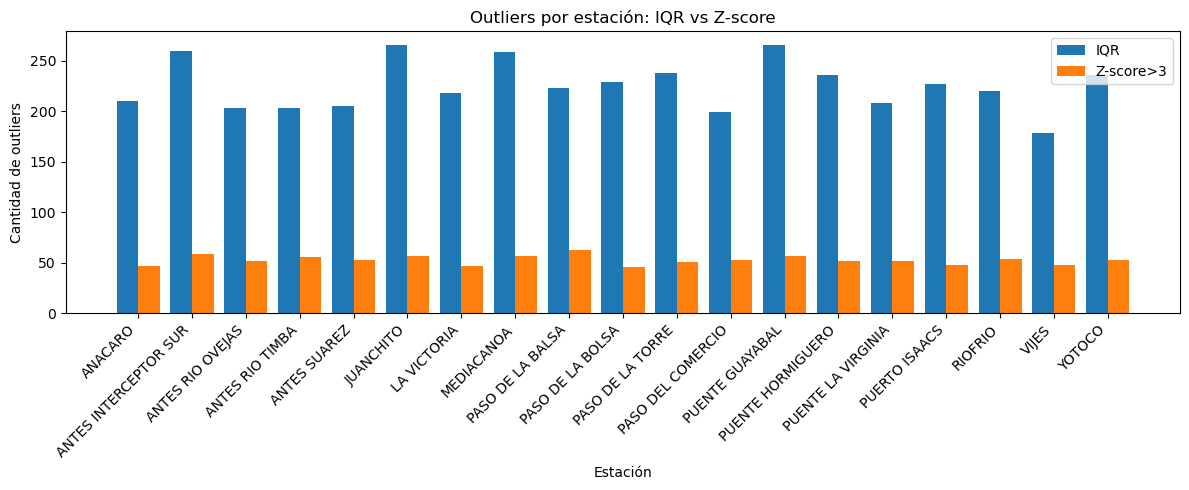

In [171]:
def outliers_por_estacion(df, col_est="ESTACIONES", col_fecha="FECHA DE MUESTREO"):
    evitar = {col_est, col_fecha}
    num_cols = [c for c in df.columns if c not in evitar and pd.api.types.is_numeric_dtype(df[c])]

    filas = []
    for est in sorted(df[col_est].dropna().astype(str).unique(), key=str.casefold):
        g = df[df[col_est].astype(str) == est]

        out_iqr = 0
        out_z3  = 0
        n_valid = 0

        for c in num_cols:
            x = pd.to_numeric(g[c], errors="coerce").dropna()
            if x.empty:
                continue
            n_valid += len(x)

            q1, q3 = x.quantile(0.25), x.quantile(0.75)
            iqr = q3 - q1
            low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
            out_iqr += ((x < low) | (x > high)).sum()

            m, s = x.mean(), x.std(ddof=1)
            if s and s > 0:
                z = (x - m) / s
                out_z3 += (z.abs() > 3).sum()

        filas.append({
            "Estacion": est,
            "N.Valid": int(n_valid),
            "Outliers_IQR": int(out_iqr),
            "Outliers_Z3": int(out_z3),
            "%Outliers_IQR": round(100*out_iqr/n_valid, 2) if n_valid else 0,
            "%Outliers_Z3": round(100*out_z3/n_valid, 2) if n_valid else 0
        })

    res = pd.DataFrame(filas).sort_values("Estacion").reset_index(drop=True)
    return res

# calcular tabla
tbl_out = outliers_por_estacion(df_filtrado)
display(tbl_out)

# gráfico de barras comparando outliers
def plot_outliers_estacion(tabla):
    xlabs = tabla["Estacion"].tolist()
    iqr = tabla["Outliers_IQR"].to_numpy()
    z3  = tabla["Outliers_Z3"].to_numpy()

    x = np.arange(len(xlabs))
    w = 0.4

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x - w/2, iqr, width=w, label="IQR")
    ax.bar(x + w/2, z3,  width=w, label="Z-score>3")
    ax.set_xticks(x)
    ax.set_xticklabels(xlabs, rotation=45, ha="right")
    ax.set_ylabel("Cantidad de outliers")
    ax.set_xlabel("Estación")
    ax.set_title("Outliers por estación: IQR vs Z-score")
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_outliers_estacion(tbl_out)


In [172]:
def _iqr_mask(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if pd.isna(iqr) or iqr == 0:
        return pd.Series(False, index=s.index), q1, q3, iqr
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    mask = (s < lo) | (s > hi)
    return mask.fillna(False), q1, q3, iqr

def _unit_from_name(col: str):
    # extrae lo que está entre paréntesis como unidad
    m = pd.Series([col]).str.extract(r"\((.*?)\)", expand=False).iloc[0]
    return m if isinstance(m, str) else ""

def _plot_station_outliers(df_est: pd.DataFrame, max_cols=3):
    num_cols = [c for c in df_est.columns 
                if c != "ESTACIONES" and pd.api.types.is_numeric_dtype(df_est[c])]
    if not num_cols:
        print("No hay variables numéricas en esta estación.")
        return

    n = len(num_cols)
    ncols = max_cols
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(11, 2.0*nrows), squeeze=False)
    ax_iter = axes.ravel()

    for ax, col in zip(ax_iter, num_cols):
        s = pd.to_numeric(df_est[col], errors="coerce")
        mask, q1, q3, iqr = _iqr_mask(s)

        # eje X: índice (para separar puntos), eje Y: valor
        idx = np.arange(len(s))
        ax.scatter(idx[~mask], s[~mask], s=6)
        ax.scatter(idx[mask],  s[mask],  s=10)

        # caja simple con Q1, Q3 y mediana
        if not pd.isna(q1) and not pd.isna(q3):
            med = s.median()
            ax.hlines([q1, med, q3], xmin=0, xmax=len(s)-1, linewidths=1)

        ax.set_title(col, fontsize=8)
        ax.set_xlabel("")
        ax.set_ylabel(_unit_from_name(col), fontsize=7)

        # log si todo es >0 y hay rango
        vals = s.dropna().values
        if vals.size and np.all(vals > 0) and vals.max() / max(vals.min(), 1e-12) > 50:
            ax.set_yscale("log")

        ax.tick_params(axis="both", labelsize=7)
        ax.margins(x=0.02)

    # limpia subplots sobrantes
    for ax in ax_iter[n:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# === widget ===
est_options = sorted(bases_estaciones.keys())
dd_est = Dropdown(options=est_options, description="Estación:", layout=Layout(width="50%"))
sl_cols = IntSlider(value=3, min=2, max=5, step=1, description="Cols:", layout=Layout(width="40%"))
out = Output(layout=Layout(border="1px solid #ddd"))

def _render(*_):
    out.clear_output()
    with out:
        df_est = bases_estaciones[dd_est.value]
        _plot_station_outliers(df_est, max_cols=sl_cols.value)

dd_est.observe(_render, names="value")
sl_cols.observe(_render, names="value")

display(VBox([HBox([dd_est, sl_cols]), out]))
_render()

In [173]:
plt.rcParams["axes.formatter.useoffset"] = False

# --- utilidades ---
def _num_cols(df, col_est="ESTACIONES", col_fecha="FECHA DE MUESTREO"):
    evitar = {col_est, col_fecha}
    return [c for c in df.columns
            if c not in evitar and pd.api.types.is_numeric_dtype(df[c])]

def _mask_out_iqr(x):
    x = pd.to_numeric(x, errors="coerce").dropna()
    if x.empty:
        # retorno índices y máscara vacíos
        return x.index, pd.Series([], dtype=bool, index=x.index)
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return x.index, (x < low) | (x > high)

# --- widget sólo barras ---
def widget_outliers_barras(df_filtrado, col_est="ESTACIONES", col_fecha="FECHA DE MUESTREO"):
    estaciones = sorted(df_filtrado[col_est].dropna().astype(str).unique(), key=str.casefold)

    @interact(Estación=Dropdown(options=estaciones, description="Estación:"))
    def _ver(Estación):
        g = df_filtrado[df_filtrado[col_est].astype(str) == Estación].copy()

        cols = _num_cols(g, col_est, col_fecha)
        if not cols:
            print("No hay variables numéricas para esta estación.")
            return

        # % de outliers por variable (IQR)
        filas = []
        for c in cols:
            x = pd.to_numeric(g[c], errors="coerce")
            _, mask = _mask_out_iqr(x)
            pct = float(mask.mean()) * 100 if len(mask) else 0.0
            filas.append((c, pct))

        pct_df = (pd.DataFrame(filas, columns=["Variable", "%Outliers_IQR"])
                    .sort_values("%Outliers_IQR", ascending=False)
                    .reset_index(drop=True))

        # alto dinámico: 0.33" por variable (mín 4", máx 14")
        h = np.clip(0.33 * len(pct_df), 4, 14)
        fig, ax = plt.subplots(figsize=(10, h))

        ax.barh(pct_df["Variable"], pct_df["%Outliers_IQR"])
        ax.invert_yaxis()  # mayor arriba
        ax.set_xlabel("% de outliers (IQR)")
        ax.set_ylabel("Variable")
        ax.set_title(f"% de registros atípicos por variable · {Estación}")
        ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))
        ax.grid(axis="x", linestyle=":", alpha=0.5)

        # valores al final de cada barra
        for y, v in enumerate(pct_df["%Outliers_IQR"]):
            ax.text(v + 0.3, y, f"{v:.1f}%", va="center", fontsize=8)

        plt.tight_layout()
        plt.show()

# Ejecuta el widget sobre df_filtrado
widget_outliers_barras(df_filtrado)

interactive(children=(Dropdown(description='Estación:', options=('ANACARO', 'ANTES INTERCEPTOR SUR', 'ANTES RI…

# MANEJO DE FALTANTES